## Sales Analysis

### Import Libraries

In [1]:
import pandas as pd
import os

### Create New DataFrame

In [2]:
# Get list of files excluding directories and non-CSV files
files = [file for file in os.listdir('./Sales_Data') if file.endswith('.csv') and os.path.isfile(os.path.join('./Sales_Data', file))]

all_months_data = pd.DataFrame()

for file in files:
    file_path = os.path.join('./Sales_Data', file)
    try:
        df = pd.read_csv(file_path)
        all_months_data = pd.concat([all_months_data, df], ignore_index=True)
    except pd.errors.ParserError as e:
        print(f"Error parsing {file_path}: {e}")
    except Exception as e:
        print(f"Unexpected error with {file_path}: {e}")

# Save the combined DataFrame to a CSV file
all_months_data.to_csv("all_data.csv", index=False)


In [3]:
# Read Data Frame

all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Data Cleaning

#### Drop Rows with NaN

In [4]:
# Find NaN from data set
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Remove rows with NaN values from all_data DataFrame in place
all_data.dropna(inplace=True)

# Display the first few rows of the modified data
print("\nModified data (NaN removed):")
print(all_data.head())


Modified data (NaN removed):
  Order ID                     Product Quantity Ordered Price Each  \
0   176558        USB-C Charging Cable                2      11.95   
2   176559  Bose SoundSport Headphones                1      99.99   
3   176560                Google Phone                1        600   
4   176560            Wired Headphones                1      11.99   
5   176561            Wired Headphones                1      11.99   

       Order Date                      Purchase Address  
0  04/19/19 08:46          917 1st St, Dallas, TX 75001  
2  04/07/19 22:30     682 Chestnut St, Boston, MA 02215  
3  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
4  04/12/19 14:38  669 Spruce St, Los Angeles, CA 90001  
5  04/30/19 09:27     333 8th St, Los Angeles, CA 90001  


In [6]:
# Check if there are any NaN values remaining in the DataFrame
if all_data.isna().sum().sum() == 0:
    print("\nNo NaN values remaining in the DataFrame.")
else:
    print("\nThere are still NaN values in the DataFrame.")
    # Optionally, print rows with NaN values
    print("\nRows with NaN values:")
    print(all_data[all_data.isna().any(axis=1)].head())


No NaN values remaining in the DataFrame.


#### Drop Rows with Or

In [7]:
#Check the rows with Or

temp_data = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [8]:
# Remove rows with Or

all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

#### Convert columns to the Correct Type

In [9]:
# Make int
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

#Make float
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Convert Order Date into datetime

In [10]:
# First Method.
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data.head()

# Second Method.
# all_data['Order Date'] = all_data['Order Date'] + pd.to_timedelta(all_data['Hour'], unit='h') + pd.to_timedelta(all_data['Minute'], unit='m')

# all_data['Order Date'] = all_data['Order Date'].dt.date
# all_data.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_3680\478858573.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"


#### Create Month Column

In [11]:
# First method.
all_data['Month'] = all_data['Order Date'].dt.month.astype(int)
all_data.head()

# Second method.
# all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = all_data['Month'].astype('int32')
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


#### Create Sales Column

In [12]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


#### Create City Column

In [13]:
# First method.

def get_city(address):
    return address.split(',')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x))
all_data.head()


# second method.

# all_data['City'] = all_data['Purcahse Address'].apply(lambda x: x.split(',')[1])
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### Create State Column

In [14]:
# First method.

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['State'] = all_data['Purchase Address'].apply(lambda x: get_state(x))
all_data.head()


# Second method adding state in city only which will dispaly like "Dallas(TX)".

# def get_city(address):
#     return address.split(',')[1]

# def get_state(address):
#     return address.split(',')[2].split(' ')[1]

# all_data['State'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
# all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


#### Create Hour and Minute Column

In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data['Count'] = 1
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,State,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27,1


### Data Exploration!

### Question 1: What was the best month for sales? How much was earned that month?

In [16]:
# First method.

month_sales = all_data.groupby('Month').agg({
    'Sales': 'sum',
}).reset_index()

month_sales.head(10)


# Second method. 

# results = all_data.groupby(['Month']).sum()['Sales']
# results.head(10)

,Month,Sales
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


#### Import Required Libraries for Plotting

In [17]:
import matplotlib.pyplot as plt

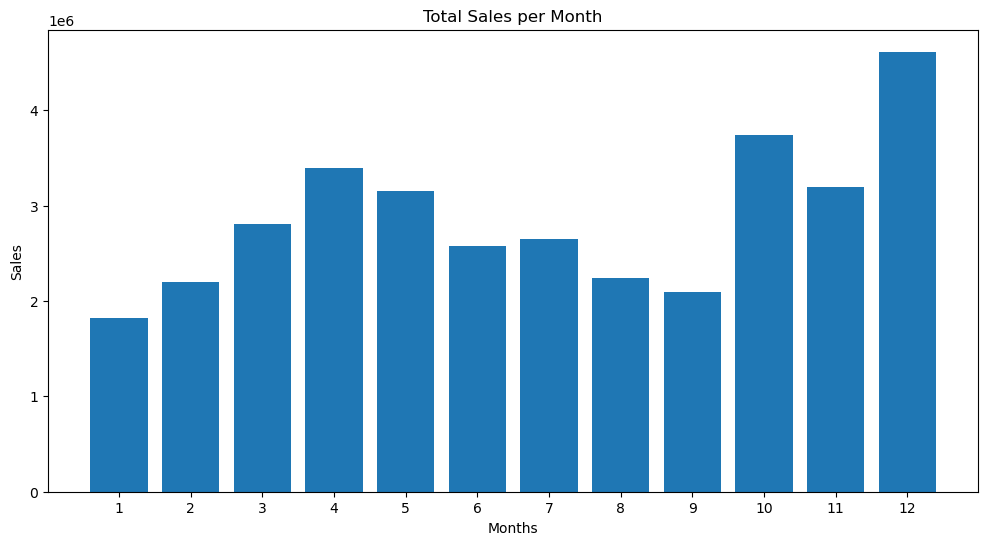

In [18]:
# Plot the graph

months_range = range(1,13)

plt.figure(figsize=(12, 6))

plt.bar(month_sales['Month'], month_sales['Sales'])
plt.xticks(months_range)
plt.ylabel('Sales')
plt.xlabel('Months')
plt.title('Total Sales per Month')
plt.show()

Sales show a steady increase from January to April, with a significant peak in December, highlighting the importance of the holiday season.

### Question 2: What city sold the most product?

In [19]:
# Group by 'City' and sum values
city_sales = all_data.groupby('City').agg({
    'Sales': 'sum',
    'State': 'first'
}).reset_index()

city_sales.head()

,City,Sales,State
0,Atlanta,2795498.58,GA
1,Austin,1819581.75,TX
2,Boston,3661642.01,MA
3,Dallas,2767975.40,TX
4,Los Angeles,5452570.80,CA


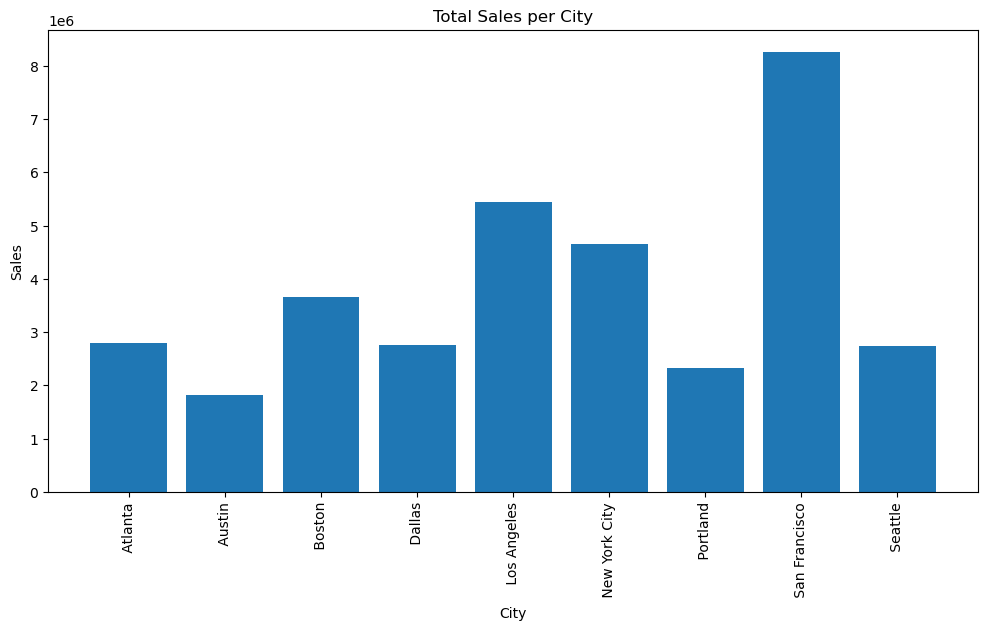

In [20]:
# Plot the graph
plt.figure(figsize=(12, 6))

plt.bar(city_sales['City'], city_sales['Sales'])
plt.xticks(rotation='vertical')
plt.ylabel('Sales')
plt.xlabel('City')
plt.title('Total Sales per City')
plt.show()

San Francisco, Los Angeles, and Boston dominate in total sales, while Austin and Seattle lag behind.

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

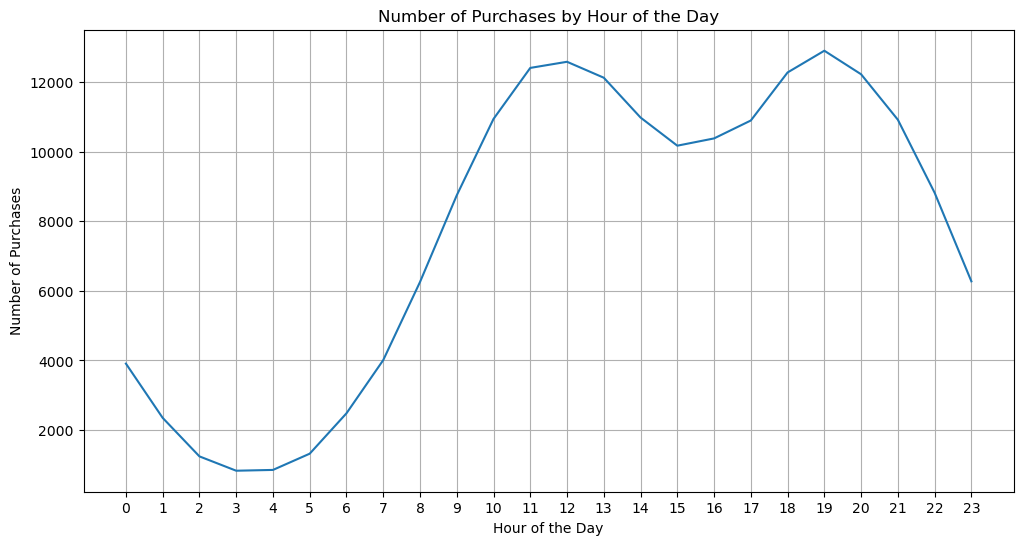

In [21]:
hours = [hour for hour, df in all_data.groupby('Hour')]

plt.figure(figsize=(12, 6))

plt.plot(hours, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(hours)
plt.grid()
plt.title('Number of Purchases by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Purchases')
plt.show()

The majority of purchases occur between 11 AM and 7 PM, with a significant drop-off during early morning hours.

### Question 4: What products are most often sold together?

In [22]:
# First, check and align duplicates
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Now, create a group of duplicated order IDs
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Now lets remove duplicate 
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()

C:\Users\Shubham\AppData\Local\Temp\ipykernel_19340\3255078327.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [23]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

# Now Count the pairs of products grouped together most frequently 
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)
    
# If you wanted see most items that were sold as three items together consider following code
# for row in df['Grouped']:
#     row_list = row.split(',')
#     count.update(Counter(combinations(row_list, 3)))
 

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


iPhones are often purchased with Lightning Charging Cables, and Google Phones with USB-C Charging Cables.

### Question 5: What product sold the most? Why do you think it sold the most?

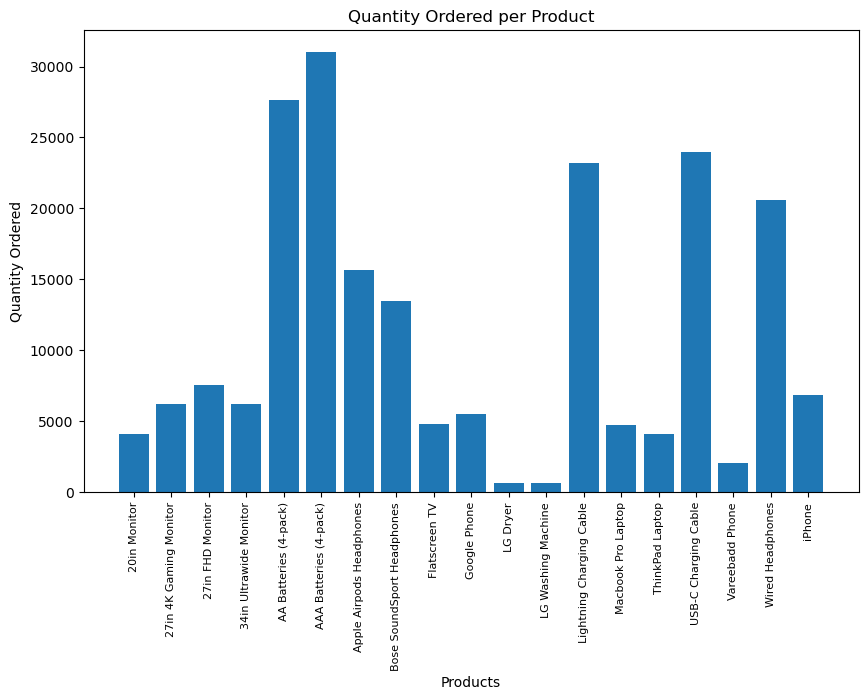

In [24]:
# First method
numeric_columns = ['Quantity Ordered', 'Price Each', 'Sales']  # replace with the names of your numeric columns
product_group = all_data.groupby('Product')[numeric_columns].sum()

# Extract products and quantities
products = product_group.index
quantity_ordered = product_group['Quantity Ordered']

# Plot the bar chart
plt.figure(figsize=(10,6))
plt.bar(products, quantity_ordered)
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered per Product')
plt.show()

# Second method. Group by 'Product' and sum specified numeric columns
# product_group = all_data.groupby('Product').sum(numeric_only=True)


# Third method.
# product_group = all_data.groupby('Product')
# product_group.sum()


Lower-cost, high-demand products like "AA Batteries (4-pack)," "AAA Batteries (4-pack)," and various charging cables are ordered in large quantities.

Empty DataFrame
Columns: [Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address, Month, Sales, City, State, Hour, Minute, Count]
Index: []


C:\Users\Shubham\AppData\Local\Temp\ipykernel_19340\48681151.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation='vertical', size=8)


<Figure size 1200x600 with 0 Axes>

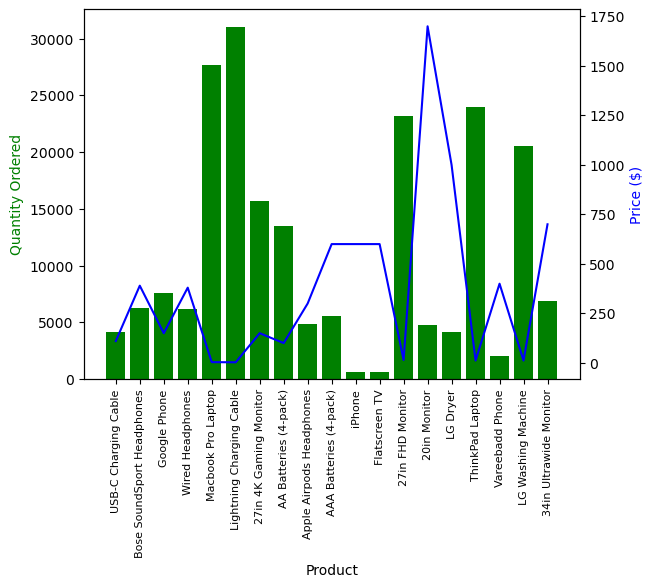

In [29]:
# Step 1: Check for non-numeric values in 'Price Each' column
non_numeric_prices = all_data[~all_data['Price Each'].apply(lambda x: isinstance(x, (int, float)))]
print(non_numeric_prices)

# Step 2: Convert 'Price Each' column to numeric values
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'], errors='coerce')

# Step 3: Drop rows with NaN values in 'Price Each' column
all_data = all_data.dropna(subset=['Price Each'])

# Step 4: Calculate the mean price for each product
prices = all_data.groupby('Product')['Price Each'].mean()

# Step 5: Generate the plot

plt.figure(figsize=(12,6))
products = all_data['Product'].unique()
quantity_ordered = all_data.groupby('Product')['Quantity Ordered'].sum()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

There is a clear trend where higher-priced items, such as monitors and laptops, have lower quantities ordered, while lower-priced items like batteries and charging cables see higher quantities ordered.

The average price for each product, after data cleaning, reveals that premium items like the "MacBook Pro Laptop" and "27in 4K Gaming Monitor" are among the higher-priced products.

### Conclusion:

The analysis reveals that December is the most profitable month, driven by holiday shopping, with additional sales peaks in April and October. San Francisco and Los Angeles are top-performing markets, suggesting targeted marketing in these cities. Peak sales occur from noon to late afternoon, indicating the best times for promotions.

Bundling frequently purchased products can boost revenue, while maintaining a balanced inventory of both high-demand, low-cost items and premium products is essential for optimizing profits. These insights can guide more effective marketing and inventory strategies to enhance overall sales performance.
